In [1]:
!pip install fastf1 -q

In [2]:
import utils
import fastf1
def events_available(year: int) -> any:
    # get events available for a given year
    data = utils.LatestData(year)
    events = data.get_events()
    return events

events = events_available(2018)
print(events)

['Bahrain Grand Prix', 'Chinese Grand Prix', 'Azerbaijan Grand Prix', 'Spanish Grand Prix', 'Monaco Grand Prix', 'Canadian Grand Prix', 'French Grand Prix', 'Austrian Grand Prix', 'British Grand Prix', 'German Grand Prix', 'Hungarian Grand Prix', 'Belgian Grand Prix', 'Italian Grand Prix', 'Singapore Grand Prix', 'Russian Grand Prix', 'Japanese Grand Prix', 'United States Grand Prix', 'Mexican Grand Prix', 'Brazilian Grand Prix', 'Abu Dhabi Grand Prix']


In [79]:
YEAR = 2023
EVENT = "United States Grand Prix"
SESSION = "Race"
driver = "LEC"
lap_number = 2

In [80]:
import fastf1
f1session = fastf1.get_session(YEAR, EVENT, SESSION)
f1session.load(telemetry=True, weather=False, messages=False)
laps = f1session.laps

driver_laps = laps.pick_driver(driver)
driver_laps["LapTime"] = driver_laps["LapTime"].dt.total_seconds()

# get the telemetry for lap_number
selected_lap = driver_laps[driver_laps.LapNumber == lap_number]

telemetry = selected_lap.get_telemetry()

lon_acc, lat_acc = compute_accelerations(telemetry)
telemetry["lon_acc"] = lon_acc*10
telemetry["lat_acc"] = lat_acc*10

# telemetry["Time"] = telemetry["Time"].dt.total_seconds()

laptime = selected_lap.LapTime.values[0]
# data_key = f"{driver} - Lap {int(lap_number)} - {year} {session} [laptime]"

telemetry["DRS"] = telemetry["DRS"].apply(lambda x: 1 if x in [10, 12, 14] else 0)


core           INFO 	Loading data for United States Grand Prix - Race [v3.1.6]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data


req            INFO 	Using cached data for position_data
core           INFO 	Finished loading data for 20 drivers: ['1', '4', '55', '11', '63', '10', '18', '22', '23', '2', '27', '77', '24', '20', '3', '14', '81', '31', '44', '16']
/tmp/ipykernel_1969/89199575.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  driver_laps["LapTime"] = driver_laps["LapTime"].dt.total_seconds()


In [81]:
fda = accCalc(telemetry, 3,9, 9)

In [82]:
fda

,Date,SessionTime,DriverAhead,DistanceToDriverAhead,Time,RPM,Speed,nGear,Throttle,Brake,...,RelativeDistance,Status,X,Y,Z,lon_acc,lat_acc,Ax,Ay,Az
2,2023-10-22 19:05:25.215,0 days 01:04:22.982000,,118.215278,0 days 00:00:00,11442,211,5,99,False,...,0.000024,OnTrack,-1367,-393,1302,2.7,0.0,2.903196,-18.852642,-0.518703
3,2023-10-22 19:05:25.319,0 days 01:04:23.086000,,118.215278,0 days 00:00:00.104000,11504,212,5,99,False,...,0.001164,OnTrack,-1306,-412,1302,6.2,5.5,6.761221,-18.594667,0.135095
4,2023-10-22 19:05:25.399,0 days 01:04:23.166000,,118.215278,0 days 00:00:00.184000,11628,215,5,99,False,...,0.002051,OnTrack,-1267,-441,1302,11.8,-1.4,7.722759,-18.515541,0.135095
5,2023-10-22 19:05:25.439,0 days 01:04:23.206000,,118.215278,0 days 00:00:00.224000,11694,217,5,99,False,...,0.002497,OnTrack,-1248,-456,1303,6.9,-2.3,7.638889,-18.591782,-0.427240
6,2023-10-22 19:05:25.599,0 days 01:04:23.366000,,118.215278,0 days 00:00:00.384000,11760,219,5,99,False,...,0.004303,OnTrack,-1171,-516,1302,6.5,-1.0,6.086074,-18.758866,-0.427240
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
788,2023-10-22 19:07:07.239,0 days 01:06:05.006000,4,139.892500,0 days 00:01:42.024000,10438,192,4,99,False,...,0.993725,OnTrack,-1575,-212,1302,7.0,0.1,5.251338,-3.254137,-0.269504
789,2023-10-22 19:07:07.240,0 days 01:06:05.007000,4,141.136944,0 days 00:01:42.025000,10508,192,4,99,False,...,0.993735,OnTrack,-1575,-213,1302,4.7,0.7,4.388543,-3.326030,-0.351758
790,2023-10-22 19:07:07.399,0 days 01:06:05.166000,4,142.381389,0 days 00:01:42.184000,10578,192,5,99,False,...,0.995291,OnTrack,-1506,-260,1301,6.4,1.4,4.850468,-3.438051,-0.134838
791,2023-10-22 19:07:07.640,0 days 01:06:05.407000,4,142.381389,0 days 00:01:42.425000,10982,201,5,99,False,...,0.997790,OnTrack,-1403,-337,1302,8.5,0.0,6.759594,-3.089129,-0.134838


In [83]:
!pip install matplotlib


Defaulting to user installation because normal site-packages is not writeable


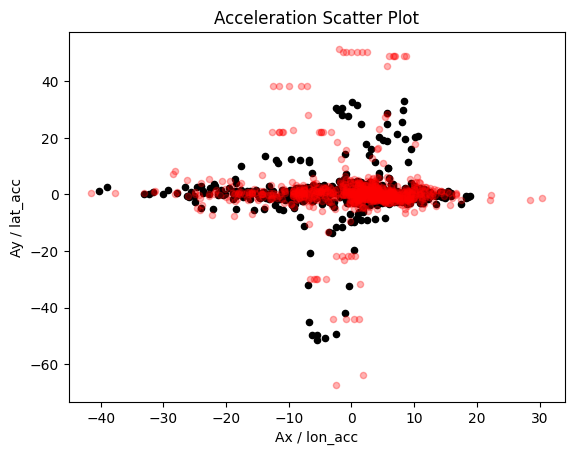

In [84]:
import matplotlib.pyplot as plt

# Assuming 'fda' and 'telemetry' are DataFrames you have defined somewhere in your code

# Correcting the call to plt.subplots()
fig, ax = plt.subplots()

# Assuming 'fda' and 'telemetry' are DataFrames you have defined somewhere in your code
fda.plot("Ax", "Az", kind="scatter", color="black", ax=ax, )
telemetry.plot("lon_acc", "lat_acc", kind="scatter", color="red", ax=ax, alpha=0.3)

# Adding labels and title for better visualization
ax.set_xlabel("Ax / lon_acc")
ax.set_ylabel("Ay / lat_acc")
ax.set_title("Acceleration Scatter Plot")

# Display the plot
plt.show()


<Axes: xlabel='lon_acc', ylabel='lat_acc'>

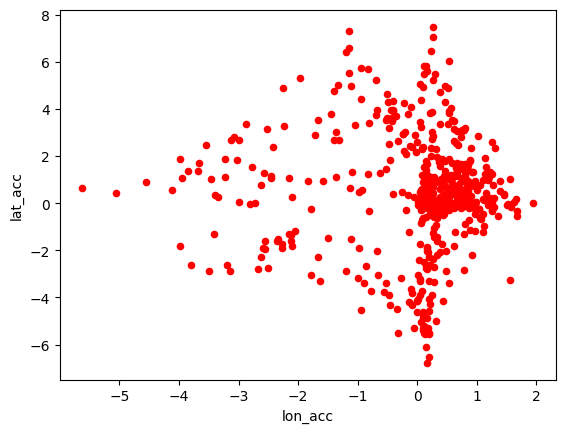

In [6]:
import numpy as np

def accCalc(allLapsDriverTelemetry, Nax, Nay, Naz):
    vx = allLapsDriverTelemetry['Speed'] / 3.6
    time_float = allLapsDriverTelemetry['Time'] / np.timedelta64(1, 's')
    dtime = np.gradient(time_float)
    ax = np.gradient(vx) / dtime

    for i in np.arange(1, len(ax) - 1).astype(int):
        if ax[i] > 25:
            ax[i] = ax[i - 1]

    ax_smooth = np.convolve(ax, np.ones((Nax,)) / Nax, mode='same')
    x = allLapsDriverTelemetry['X']
    y = allLapsDriverTelemetry['Y']
    z = allLapsDriverTelemetry['Z']

    dx = np.gradient(x)
    dy = np.gradient(y)
    dz = np.gradient(z)

    theta = np.arctan2(dy, (dx + np.finfo(float).eps))
    theta[0] = theta[1]
    theta_noDiscont = np.unwrap(theta)

    dist = allLapsDriverTelemetry['Distance']
    ds = np.gradient(dist)
    dtheta = np.gradient(theta_noDiscont)

    for i in np.arange(1, len(dtheta) - 1).astype(int):
        if abs(dtheta[i]) > 0.5:
            dtheta[i] = dtheta[i - 1]

    C = dtheta / (ds + 0.0001)  # To avoid division by 0

    ay = np.square(vx) * C
    indexProblems = np.abs(ay) > 150
    ay[indexProblems] = 0

    ay_smooth = np.convolve(ay, np.ones((Nay,)) / Nay, mode='same')

    # for z
    z_theta = np.arctan2(dz, (dx + np.finfo(float).eps))
    z_theta[0] = z_theta[1]
    z_theta_noDiscont = np.unwrap(z_theta)

    dist = allLapsDriverTelemetry['Distance']
    ds = np.gradient(dist)
    z_dtheta = np.gradient(z_theta_noDiscont)

    for i in np.arange(1, len(z_dtheta) - 1).astype(int):
        if abs(z_dtheta[i]) > 0.5:
            z_dtheta[i] = z_dtheta[i - 1]

    z_C = z_dtheta / (ds + 0.0001)  # To avoid division by 0

    az = np.square(vx) * z_C
    indexProblems = np.abs(az) > 150
    az[indexProblems] = 0

    az_smooth = np.convolve(az, np.ones((Naz,)) / Naz, mode='same')



    allLapsDriverTelemetry['Ax'] = ax_smooth
    allLapsDriverTelemetry['Ay'] = ay_smooth
    allLapsDriverTelemetry['Az'] = az_smooth

    return allLapsDriverTelemetry


In [46]:
import math

import numpy as np


def smooth_derivative(t_in, v_in):
    #
    # Function to compute a smooth estimation of a derivative.
    # [REF: http://holoborodko.com/pavel/numerical-methods/numerical-derivative/smooth-low-noise-differentiators/]
    #

    # Configuration
    #
    # Derivative method: two options: 'smooth' or 'centered'. Smooth is more conservative
    # but helps to supress the very noisy signals. 'centered' is more agressive but more noisy
    method = "smooth"

    t = t_in.copy()
    v = v_in.copy()

    # (0) Prepare inputs

    # (0.1) Time needs to be transformed to seconds
    try:
        for i in range(0, t.size):
            t.iloc[i] = t.iloc[i].total_seconds()
    except:
        pass

    t = np.array(t)
    v = np.array(v)

    # (0.1) Assert they have the same size
    assert t.size == v.size

    # (0.2) Initialize output
    dvdt = np.zeros(t.size)

    # (1) Manually compute points out of the stencil

    # (1.1) First point
    dvdt[0] = (v[1] - v[0]) / (t[1] - t[0])

    # (1.2) Second point
    dvdt[1] = (v[2] - v[0]) / (t[2] - t[0])

    # (1.3) Third point
    dvdt[2] = (v[3] - v[1]) / (t[3] - t[1])

    # (1.4) Last points
    n = t.size
    dvdt[n - 1] = (v[n - 1] - v[n - 2]) / (t[n - 1] - t[n - 2])
    dvdt[n - 2] = (v[n - 1] - v[n - 3]) / (t[n - 1] - t[n - 3])
    dvdt[n - 3] = (v[n - 2] - v[n - 4]) / (t[n - 2] - t[n - 4])

    # (2) Compute the rest of the points
    if method == "smooth":
        c = [5.0 / 32.0, 4.0 / 32.0, 1.0 / 32.0]
        for i in range(3, t.size - 3):
            for j in range(1, 4):
                if (t[i + j] - t[i - j]) == 0:
                    dvdt[i] += 0
                else:
                    dvdt[i] += (
                        2 * j * c[j - 1] * (v[i + j] - v[i - j]) / (t[i + j] - t[i - j])
                    )
    elif method == "centered":
        for i in range(3, t.size - 2):
            for j in range(1, 4):
                if (t[i + j] - t[i - j]) == 0:
                    dvdt[i] += 0
                else:

                    dvdt[i] = (v[i + 1] - v[i - 1]) / (t[i + 1] - t[i - 1])

    return dvdt


def truncated_remainder(dividend, divisor):
    divided_number = dividend / divisor
    divided_number = (
        -int(-divided_number) if divided_number < 0 else int(divided_number)
    )

    remainder = dividend - divisor * divided_number

    return remainder


def transform_to_pipi(input_angle):
    pi = math.pi
    revolutions = int((input_angle + np.sign(input_angle) * pi) / (2 * pi))

    p1 = truncated_remainder(input_angle + np.sign(input_angle) * pi, 2 * pi)
    p2 = (
        np.sign(
            np.sign(input_angle)
            + 2
            * (
                np.sign(
                    math.fabs(
                        (truncated_remainder(input_angle + pi, 2 * pi)) / (2 * pi)
                    )
                )
                - 1
            )
        )
    ) * pi

    output_angle = p1 - p2

    return output_angle, revolutions


def remove_acceleration_outliers(acc):
    acc_threshold_g = 7.5
    if math.fabs(acc[0]) > acc_threshold_g:
        acc[0] = 0.0

    for i in range(1, acc.size - 1):
        if math.fabs(acc[i]) > acc_threshold_g:
            acc[i] = acc[i - 1]

    if math.fabs(acc[-1]) > acc_threshold_g:
        acc[-1] = acc[-2]

    return acc


def compute_accelerations(telemetry):
    v = np.array(telemetry["Speed"]) / 3.6
    lon_acc = smooth_derivative(telemetry["Time"], v) / 9.81

    dx = smooth_derivative(telemetry["Distance"], telemetry["X"])
    dy = smooth_derivative(telemetry["Distance"], telemetry["Z"])

    theta = np.zeros(dx.size)
    theta[0] = math.atan2(dy[0], dx[0])
    for i in range(0, dx.size):
        theta[i] = (
            theta[i - 1] + transform_to_pipi(math.atan2(dy[i], dx[i]) - theta[i - 1])[0]
        )

    kappa = smooth_derivative(telemetry["Distance"], theta)
    lat_acc = v * v * kappa / 9.81

    # Remove outliers
    lon_acc = remove_acceleration_outliers(lon_acc)
    lat_acc = remove_acceleration_outliers(lat_acc)

    return np.round(lon_acc, 2), np.round(lat_acc, 2)

In [5]:
import fastf1

In [2]:
year = 2023
event = "United States Grand Prix"
session = "R"
driver = "VER"
lap_number =3

In [21]:
def telemetry_data(
    year, event, session: str, driver, lap_number
):

    f1session = fastf1.get_session(year, event, session)
    f1session.load(telemetry=True, weather=False, messages=False)
    laps = f1session.laps

    driver_laps = laps.pick_driver(driver)
    driver_laps["LapTime"] = driver_laps["LapTime"].dt.total_seconds()

    # get the telemetry for lap_number
    selected_lap = driver_laps[driver_laps.LapNumber == lap_number]

    telemetry = selected_lap.get_telemetry()

    acc_tel = accCalc(telemetry, 3, 9, 9)


    acc_tel["Time"] = acc_tel["Time"].dt.total_seconds()

    laptime = selected_lap.LapTime.values[0]
    data_key = f"{driver} - Lap {int(lap_number)} - {year} - {session} - [{laptime}]"

    acc_tel["DRS"] = acc_tel["DRS"].apply(lambda x: 1 if x in [10, 12, 14] else 0)
    acc_tel["Brake"] = acc_tel["Brake"].apply(lambda x: 1 if x == "True" else 0)


    telemetry_data = {

            "time": acc_tel["Time"],
            "rpm": acc_tel["RPM"],
            "speed": acc_tel["Speed"],
            "gear": acc_tel["nGear"],
            "throttle": acc_tel["Brake"],
            "brake": acc_tel["Distance"],
            "drs": acc_tel["DRS"],
            "distance": acc_tel["Distance"],
            "rel_distance": acc_tel["RelativeDistance"],
            "acc_x": acc_tel["Ax"],
            "acc_y": acc_tel["Ay"],
            "acc_z": acc_tel["Az"],
            "x": acc_tel["X"],
            "y": acc_tel["Y"],
            "z": acc_tel["Z"],
            "dataKey": data_key,

    }
    return telemetry_data

In [15]:
telemetry_data

{'time': 2        0.000
 3        0.119
 4        0.279
 5        0.340
 6        0.480
         ...   
 782    102.461
 783    102.480
 784    102.640
 785    102.661
 786    102.700
 Name: Time, Length: 785, dtype: float64,
 'rpm': 2      10986
 3      11117
 4      11213
 5      11334
 6      11455
        ...  
 782    11039
 783    10591
 784    10591
 785    10782
 786    10877
 Name: RPM, Length: 785, dtype: int64,
 'speed': 2      206
 3      212
 4      217
 5      219
 6      221
       ... 
 782    199
 783    202
 784    207
 785    209
 786    210
 Name: Speed, Length: 785, dtype: int64,
 'gear': 2      5
 3      5
 4      5
 5      5
 6      5
       ..
 782    4
 783    5
 784    5
 785    5
 786    5
 Name: nGear, Length: 785, dtype: int64,
 'throttle': 2      False
 3      False
 4      False
 5      False
 6      False
        ...  
 782    False
 783    False
 784    False
 785    False
 786    False
 Name: Brake, Length: 785, dtype: bool,
 'brake': 2         0.20926

<Axes: xlabel='Distance', ylabel='Az'>

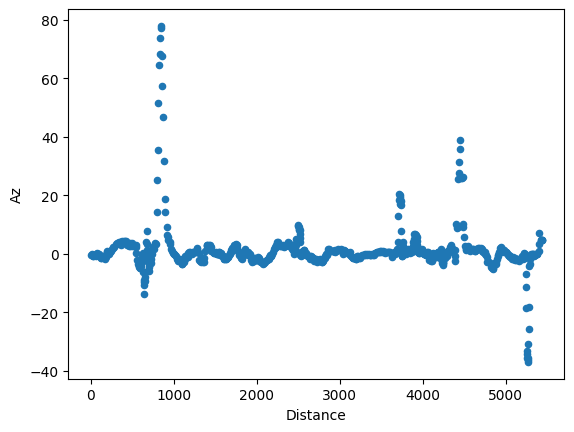

In [18]:
acc_tel.plot("Distance", "Az", kind="scatter")

In [8]:
acc_tel['Time']

,Date,SessionTime,DriverAhead,DistanceToDriverAhead,Time,RPM,Speed,nGear,Throttle,Brake,...,Source,Distance,RelativeDistance,Status,X,Y,Z,Ax,Ay,Az
2,2023-10-22 19:07:10.279,0 days 01:06:08.046000,,59.410000,0.000,10986,206,5,100,False,...,pos,0.209262,0.000038,OnTrack,-1269,-441,1302,8.319138,-0.369640,-0.253577
3,2023-10-22 19:07:10.398,0 days 01:06:08.165000,,59.410000,0.119,11117,212,5,100,False,...,car,7.255278,0.001331,OnTrack,-1203,-490,1302,11.251935,-0.349864,0.027979
4,2023-10-22 19:07:10.558,0 days 01:06:08.325000,44,59.410000,0.279,11213,217,5,100,False,...,car,16.899722,0.003101,OnTrack,-1114,-558,1302,8.426040,-0.203027,-0.204872
5,2023-10-22 19:07:10.619,0 days 01:06:08.386000,44,59.940417,0.340,11334,219,5,100,False,...,pos,20.619348,0.003784,OnTrack,-1086,-580,1302,6.318646,-0.359990,-0.790590
6,2023-10-22 19:07:10.759,0 days 01:06:08.526000,44,60.470833,0.480,11455,221,5,100,False,...,car,29.238889,0.005365,OnTrack,-1034,-619,1301,5.846781,-0.314882,-0.790590
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
782,2023-10-22 19:08:52.740,0 days 01:07:50.507000,44,72.370833,102.461,11039,199,4,100,False,...,pos,5422.520148,0.995045,OnTrack,-1422,-321,1302,7.263216,1.809634,4.738006
783,2023-10-22 19:08:52.759,0 days 01:07:50.526000,44,73.881944,102.480,10591,202,5,100,False,...,car,5423.602222,0.995243,OnTrack,-1414,-326,1301,9.455257,1.943849,4.738006
784,2023-10-22 19:08:52.919,0 days 01:07:50.686000,44,75.348611,102.640,10591,207,5,100,False,...,car,5432.802222,0.996931,OnTrack,-1341,-384,1301,12.348775,2.339145,4.938061
785,2023-10-22 19:08:52.940,0 days 01:07:50.707000,44,75.348611,102.661,10782,209,5,100,False,...,pos,5434.027485,0.997156,OnTrack,-1331,-392,1302,10.584728,4.394726,4.938061


In [9]:
acc_tel.columns

Index(['Date', 'SessionTime', 'DriverAhead', 'DistanceToDriverAhead', 'Time',
       'RPM', 'Speed', 'nGear', 'Throttle', 'Brake', 'DRS', 'Source',
       'Distance', 'RelativeDistance', 'Status', 'X', 'Y', 'Z', 'Ax', 'Ay',
       'Az'],
      dtype='object')

In [20]:
acc_tel['Brake']

2      0
3      0
4      0
5      0
6      0
      ..
782    0
783    0
784    0
785    0
786    0
Name: Brake, Length: 785, dtype: int64

In [11]:
acc_tel['RelativeDistance']

2      0.000038
3      0.001331
4      0.003101
5      0.003784
6      0.005365
         ...   
782    0.995045
783    0.995243
784    0.996931
785    0.997156
786    0.997576
Name: RelativeDistance, Length: 785, dtype: float64